In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Upload data from each state.

In [10]:
# Nuevo Leon
nuevoleon = pd.read_csv('Data/NuevoLeon/nuevoleon_2015.csv', encoding = 'ISO-8859-1', skiprows = 2)

# Jalisco 
jalisco_m = pd.read_excel('Data/Jalisco/jalisco-m_2016.xls', skiprows = 13)
jalisco_f = pd.read_excel('Data/Jalisco/jalisco-f_2016.xls', skiprows = 13)

# Data came in different files. Create new data frame with both types of licenses. 
jalisco = jalisco_m.append(jalisco_f, ignore_index = True)

### Select 'name' and 'expiration date' columns.

In [11]:
# Nuevo Leon 
nuevoleon = nuevoleon[['NOMBRE O RAZON SOCIAL DEL TITULAR', ' VENCIMIENTO']]

# Jalisco
jalisco = jalisco[['Nombre', 'Expira el']]

### Translate column names into English.

In [12]:
# Nuevo Leon
nuevoleon.rename(columns={'NOMBRE O RAZON SOCIAL DEL TITULAR': 'name', ' VENCIMIENTO': 'expiration'}, inplace = True)

# Jalisco
jalisco.rename(columns={'Nombre': 'name', 'Expira el': 'expiration'}, inplace = True)

In [13]:
# Get total number of taxis before removing missing name values. Needed for Graph 1.
total_nuevoleon = len(nuevoleon)
total_jalisco = len(jalisco)

### Drop entries with missing *name* values.

In [14]:
# Nuevo Leon
nuevoleon.dropna(subset = ['name'], inplace = True)
nuevoleon.reset_index(inplace = True, drop = True)

# Jalisco
jalisco.dropna(subset = ['name'], inplace = True)
jalisco.reset_index(inplace = True, drop = True)

### Convert *expiration* values to datetime.

In [15]:
# Nuevo Leon
nuevoleon.expiration = pd.to_datetime(nuevoleon.expiration, format = '%d/%m/%Y', errors = 'coerce')
# Found more missing 'name' values. Entries had 'NO EXISTE' as expiration and 'SIN CONCESION' as their name.
nuevoleon.dropna(subset = ['expiration'], inplace = True)
nuevoleon.reset_index(inplace = True, drop = True)

# Jalisco
# Values already as datetime. 

### Graphs: Format

In [16]:
import seaborn as sns

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

### Graph 1: Total Taxis

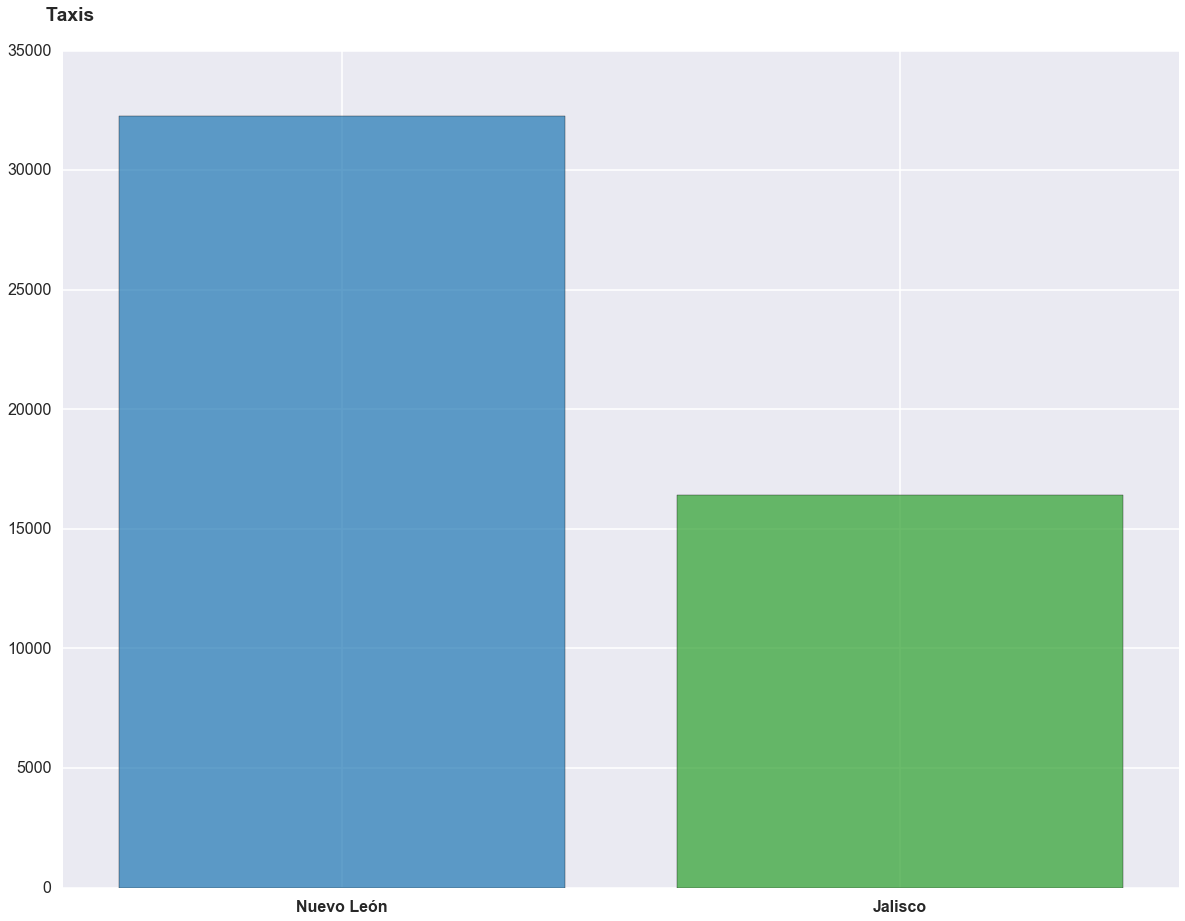

In [17]:
# Use total taxis variables created beforehand.  
# Total count on top of bars added with Adobe Illustrator. 
locations = (1, 2)
sns.set_context('poster', font_scale = 1)
plt.figure(figsize=(20,15))


plt.bar(1, total_nuevoleon, align = 'center', color = tableau20[0], alpha = .7)
plt.bar(2, total_jalisco, align = 'center', color = tableau20[4], alpha = .7)
plt.xticks(locations, ('Nuevo León', 'Jalisco'), weight = 'bold')
plt.title('Taxis', loc = 'left', y = 1.03, x = -.015, weight = 'bold')

### Graph 2: Taxi Ownership Distribution

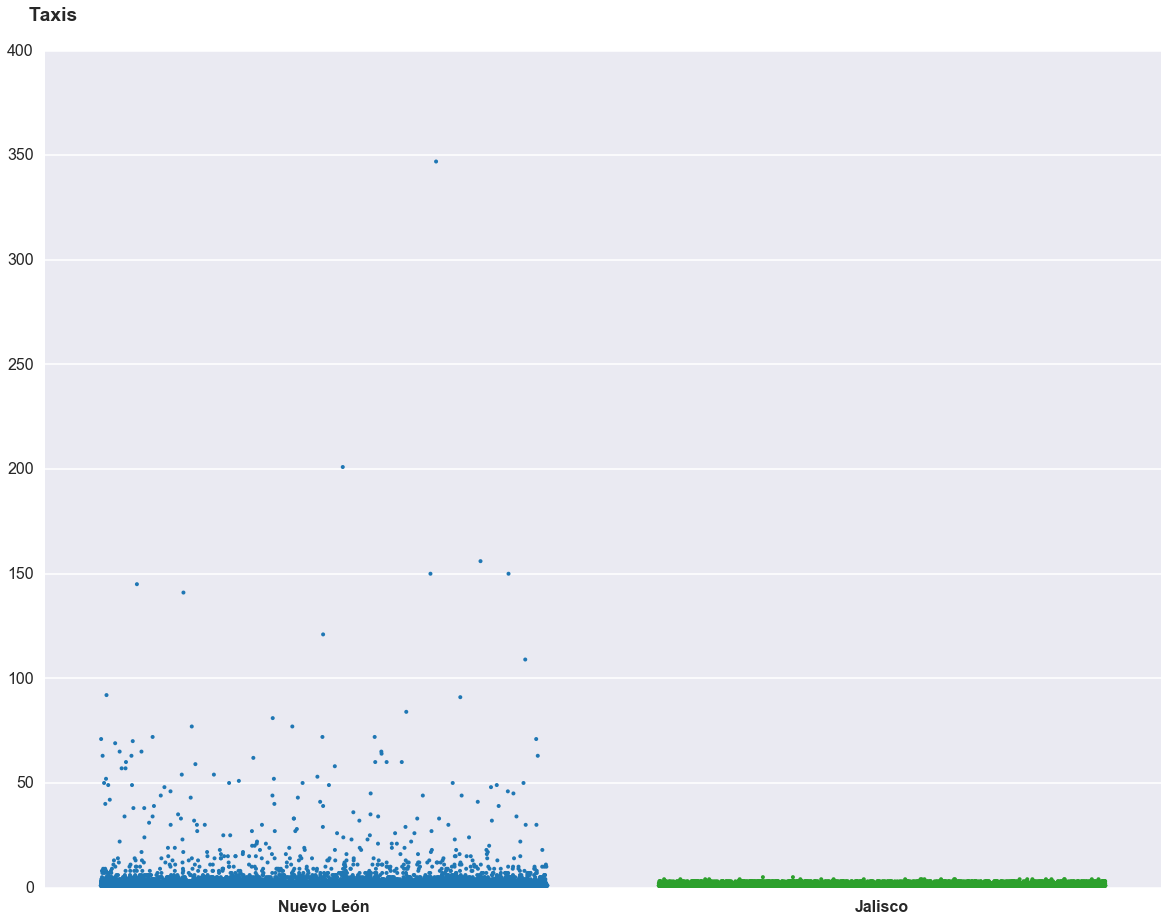

In [18]:
# Use value_counts method to find number of taxis per owner. 
locations = (0, 1)
sns.set_context('poster', font_scale = 1)
plt.figure(figsize=(20,15))


stripplot = sns.stripplot(data = [nuevoleon.name.value_counts(), jalisco.name.value_counts()],
              jitter = .4, orient = 'v', size = 4, palette = [tableau20[0], tableau20[4]])
plt.xticks(locations, ('Nuevo León', 'Jalisco'), weight = 'bold')
stripplot.set(ylim = 0)
plt.title('Taxis', loc = 'left', y = 1.03, x = -.015, weight = 'bold')

### Graph 3: Top 100 Comparison

In [19]:
# Nuevo Leon
top100_nuevoleon = nuevoleon.name.value_counts().head(100)
nuevoleon_df = pd.DataFrame(top100_nuevoleon)
nuevoleon_df.rename(columns={'name': 'taxis'}, inplace = True)
nuevoleon_df['state'] = 'nuevo leon'

# Jalisco
top100_jalisco = jalisco.name.value_counts().head(100)
jalisco_df = pd.DataFrame(top100_jalisco)
jalisco_df.rename(columns={'name': 'taxis'}, inplace = True)
jalisco_df['state'] = 'jalisco'

# Concatenate data frames. 
top100_states = [nuevoleon_df, jalisco_df]
top200 = pd.concat(top100_states)

# Export to csv file. 
top200.to_csv('top200_1.csv')

# Upload file into Raw. http://raw.densitydesign.org/
# Add missing column name. 
# Select 'Clustered Force Layout'. 
# Clusters: name. Size: taxis. Color: state.
# Labels added with Adobe Illustrator. 

### Graph 4: Top 100 Comparison (Biggest Owner)

In [20]:
# Nuevo Leon
nuevoleon_df['biggest_owner'] = nuevoleon_df['taxis'] > 300
nuevoleon_df = nuevoleon_df[['taxis', 'biggest_owner']]

# Jalisco
jalisco_df['biggest_owner'] = jalisco_df['taxis'] > 300
jalisco_df = jalisco_df[['taxis', 'biggest_owner']]

# Concatenate data frames.
top100_states = [nuevoleon_df, jalisco_df]
top200 = pd.concat(top100_states)

# Export to csv file. 
top200.to_csv('top200_2.csv')

# Upload file into Raw. http://raw.densitydesign.org/
# Add missing column name. 
# Select 'Clustered Force Layout'. 
# Clusters: name. Size: taxis. Color: biggest_owner.